# TP 2.1 : Stratégies d'investissement

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import os
import seaborn as sns


# Set the style and context for the plots
sns.set(style='darkgrid')
sns.set_context("notebook", font_scale=1.2)

# Set the figure size and font size
plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['font.size'] = 12

pd.set_option('display.max_columns', 100)

In [4]:
tickers = {
    "Banking": "JPM",       # JPMorgan Chase
    "Mining": "RIO",        # Rio Tinto
    "Automotive": "TM",     # Toyota Motor
    "Technology": "AAPL",   # Apple
    "Retail": "WMT",        # Walmart
    "Energy": "XOM",        # Exxon Mobil
    "Pharma": "PFE",        # Pfizer
    "Telecom": "VZ",        # Verizon
    "Consumer Goods": "PG", # Procter & Gamble
    "Aerospace": "LMT"      # Lockheed Martin
}
start_date = '2008-01-01'
end_date = datetime.datetime.now().strftime('%Y-%m-%d')
data = yf.download([ticker for ticker in tickers.values()], start=start_date, end=end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  10 of 10 completed


In [5]:
data.head()

Price          Close                                                         \
Ticker          AAPL        JPM        LMT        PFE         PG        RIO   
Date                                                                          
2008-01-02  5.863437  27.130791  62.334644  10.637540  43.908875  33.732372   
2008-01-03  5.866145  26.944235  63.861198  10.762905  43.908875  34.423569   
2008-01-04  5.418354  26.333017  63.015064  10.600393  43.732780  32.695564   
2008-01-07  5.345825  26.596798  62.873066  10.786120  44.018162  32.335495   
2008-01-08  5.153526  25.541689  62.896732  10.897557  44.133556  31.674837   

Price                                                       High             \
Ticker             TM         VZ        WMT        XOM      AAPL        JPM   
Date                                                                          
2008-01-02  86.411484  16.723082  10.855379  50.447735  6.026545  28.173047   
2008-01-03  86.768623  16.800484  10.735018  50.620361  5.940175  27.439628   
2008-01-04  84.366066  16.486998  10.582255  49.676250  5.808066  26.892746   
2008-01-07  84.796242  16.777256  10.776682  49.212296  5.525183  26.751207   
2008-01-08  83.635551  16.413729  10.640125  48.581089  5.490875  26.751220   

Price                                                                         \
Ticker            LMT        PFE         PG        RIO         TM         VZ   
Date                                                                           
2008-01-02  63.429272  10.693259  44.686129  33.990368  87.377385  17.083009   
2008-01-03  64.381885  10.841839  44.528253  34.580296  87.255630  17.024955   
2008-01-04  63.529837  10.772191  44.321795  34.041003  86.443966  16.885626   
2008-01-07  63.867107  10.837195  44.127464  32.426316  85.323835  16.862401   
2008-01-08  64.026859  11.106501  44.819726  33.072515  85.323848  17.324517   

Price                                  Low                                   \
Ticker            WMT        XOM      AAPL        JPM        LMT        PFE   
Date                                                                          
2008-01-02  11.024344  51.008805  5.794523  27.021419  62.092053  10.540034   
2008-01-03  10.855376  51.111295  5.798736  26.867029  61.955953  10.637538   
2008-01-04  10.732703  50.906287  5.383446  26.140008  62.500292  10.558605   
2008-01-07  10.834546  50.253512  5.122831  25.837625  62.086116  10.632895   
2008-01-08  10.897044  49.660069  5.139984  25.361544  62.819810  10.818624   

Price                                                                         \
Ticker             PG        RIO         TM         VZ        WMT        XOM   
Date                                                                           
2008-01-02  43.641696  33.322472  86.054342  16.583756  10.753538  50.053905   
2008-01-03  43.720634  33.545097  86.273498  16.723080  10.700299  50.447725   
2008-01-04  43.538467  32.491420  84.211845  16.452166  10.501245  49.568350   
2008-01-07  43.659898  31.612142  84.187482  16.548917  10.552167  48.688989   
2008-01-08  43.720639  31.665995  83.497567  15.858657  10.619294  48.381476   

Price           Open                                                         \
Ticker          AAPL        JPM        LMT        PFE         PG        RIO   
Date                                                                          
2008-01-02  5.996752  28.018638  62.583153  10.567892  44.686129  33.847304   
2008-01-03  5.880590  27.240183  62.417471  10.670041  43.969601  33.577246   
2008-01-04  5.761421  26.641833  63.447000  10.762905  43.538467  34.041003   
2008-01-07  5.454463  26.442389  63.523925  10.642182  43.866354  32.319419   
2008-01-08  5.421057  26.674015  62.873064  10.818624  44.145699  32.751829   

Price                                                       Volume            \
Ticker             TM         VZ        WMT        XOM        AAPL       JPM   
Date                      

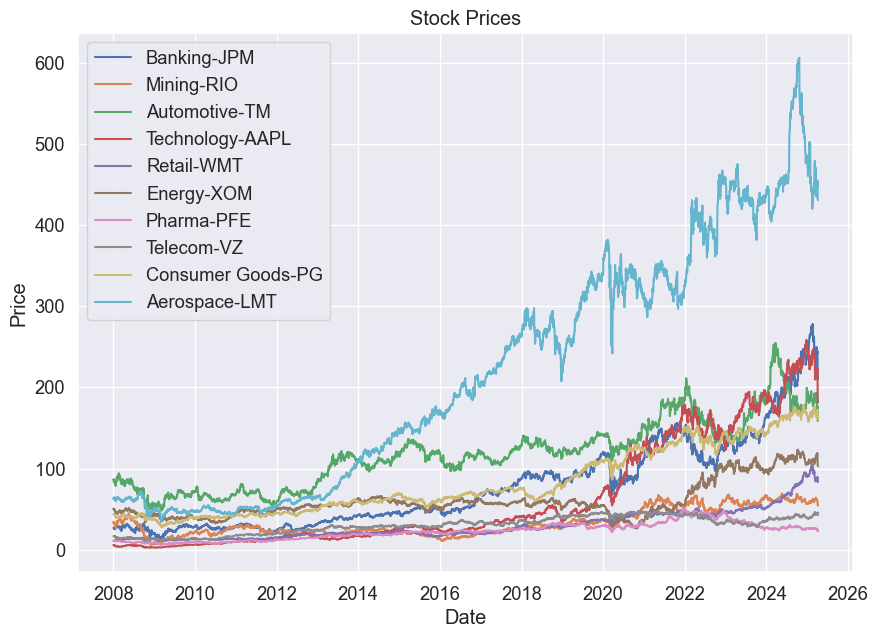

In [6]:
plt.figure(figsize=(10, 7))
for industry, ticker in tickers.items():
    plt.plot(data['Close'][ticker], label=f"{industry}-{ticker}")
plt.legend()
plt.title('Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')

plt.show()

## 1 - Moyennes mobiles

### 1.1  Implémenter une stratégie à deux paramètres, par exemple un croisement de moyennes mobiles de longueurAetB(ou EMA avec différents paramètres) sous forme de fonctions

Get the moving average

In [7]:
df_price = data['Close'].copy()

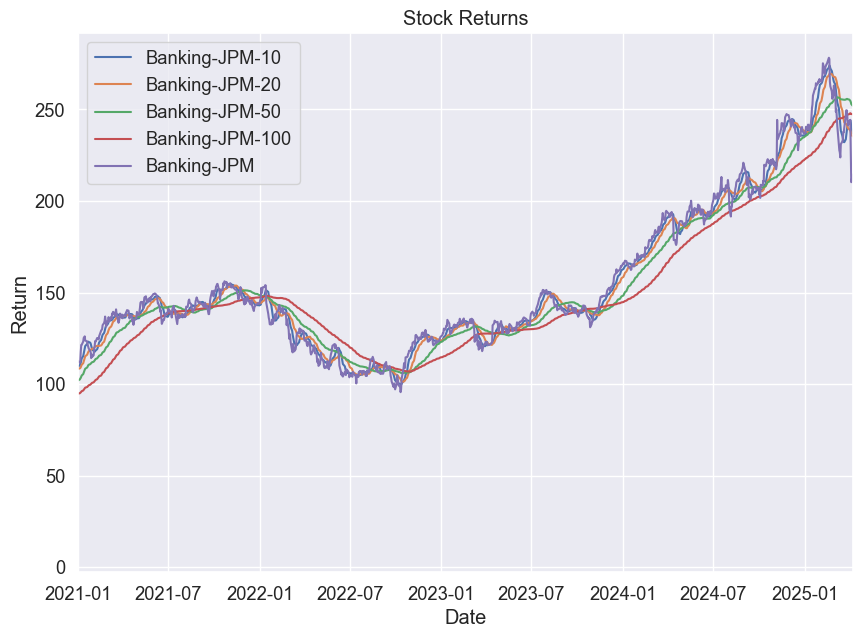

In [8]:
plt.figure(figsize=(10, 7))
for window in [10, 20, 50, 100]:
    df_moving_av = df_price.rolling(window=window).mean().copy()
    for industry, ticker in tickers.items():
        plt.plot(df_moving_av[ticker], label=f"{industry}-{ticker}-{window}")
        break
for industry, ticker in tickers.items():
    plt.plot(df_price[ticker], label=f"{industry}-{ticker}")
    break
plt.xlim(pd.to_datetime(['2021-01-01', end_date]))
plt.legend()
plt.title('Stock Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()

I want to get the position to hold between $t$ to $t+1$, called $x_t$

In [9]:
df_price.head()

Ticker,AAPL,JPM,LMT,PFE,PG,RIO,TM,VZ,WMT,XOM
Date,,,,,,,,,,
2008-01-02,5.863437,27.130791,62.334644,10.637540,43.908875,33.732372,86.411484,16.723082,10.855379,50.447735
2008-01-03,5.866145,26.944235,63.861198,10.762905,43.908875,34.423569,86.768623,16.800484,10.735018,50.620361
2008-01-04,5.418354,26.333017,63.015064,10.600393,43.732780,32.695564,84.366066,16.486998,10.582255,49.676250
2008-01-07,5.345825,26.596798,62.873066,10.786120,44.018162,32.335495,84.796242,16.777256,10.776682,49.212296
2008-01-08,5.153526,25.541689,62.896732,10.897557,44.133556,31.674837,83.635551,16.413729,10.640125,48.581089


In [10]:
df_rend = df_price.pct_change().copy()

df_price, df_rend = df_price.align(df_rend, join='inner', axis=0)

In [11]:
df_rend

Ticker,AAPL,JPM,LMT,PFE,PG,RIO,TM,VZ,WMT,XOM
Date,,,,,,,,,,
2008-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,0.000462,-0.006876,0.024490,0.011785,0.000000,0.020491,0.004133,0.004628,-0.011088,0.003422
2008-01-04,-0.076335,-0.022685,-0.013250,-0.015099,-0.004010,-0.050198,-0.027689,-0.018659,-0.014230,-0.018651
2008-01-07,-0.013386,0.010017,-0.002253,0.017521,0.006526,-0.011013,0.005099,0.017605,0.018373,-0.009340
2008-01-08,-0.035972,-0.039671,0.000376,0.010332,0.002622,-0.020431,-0.013688,-0.021668,-0.012671,-0.012826
...,...,...,...,...,...,...,...,...,...,...
2025-04-01,0.004772,-0.006686,0.004321,-0.031571,0.000821,0.002497,-0.011953,0.000441,0.011846,0.000925
2025-04-02,0.003136,0.008865,0.009428,0.006520,-0.006215,-0.005479,0.016569,-0.014103,0.010469,-0.003108
2025-04-03,-0.092456,-0.069685,0.004218,-0.016599,0.017050,-0.024541,-0.052112,0.019669,-0.027852,-0.052583


1 - 1

In [20]:
def strat_ma_crossover(df_price: pd.DataFrame,
                       A: int, B: int, 
                       ma_cache: dict, ticker=None,
                       display_switch=False) -> pd.DataFrame:
    df_strat_price = df_price.copy()
    df_strat_rend = df_price.pct_change().copy()

    # Fill missing values before alignment and processing
    df_strat_price = df_strat_price.ffill().fillna(0)
    df_strat_rend = df_strat_rend.ffill().fillna(0)

    # Align data and check for NaNs
    df_strat_price, df_strat_rend = df_strat_price.align(df_strat_rend, join='inner', axis=0)
    df_strat_price = df_strat_price.fillna(0)
    df_strat_rend = df_strat_rend.fillna(0)

    def strat(ticker):  
        col_window_1 = f'{ticker}_ma_{A}'
        col_window_2 = f'{ticker}_ma_{B}'

        if col_window_1 not in ma_cache:
            ma_cache[col_window_1] = df_strat_price[ticker].rolling(window=A).mean()
        if col_window_2 not in ma_cache:
            ma_cache[col_window_2] = df_strat_price[ticker].rolling(window=B).mean()

        df_strat_price[col_window_1] = ma_cache[col_window_1]
        df_strat_price[col_window_2] = ma_cache[col_window_2]

        # Handle possible NaN values from rolling window
        df_strat_price[f'{ticker}_signal'] = np.where(
            df_strat_price[col_window_1].isna() | df_strat_price[col_window_2].isna(),
            0,
            np.where(df_strat_price[col_window_1] < df_strat_price[col_window_2], 1, -1)
        )

        # Fill any NaN in the strategy calculations
        df_strat_rend[f'{ticker}_strategy'] = (df_strat_rend[ticker] * df_strat_price[f'{ticker}_signal'].shift(1).fillna(0)).fillna(0)

    if ticker is None:
        for industry, ticker in tickers.items():
            strat(ticker)
            
    elif ticker in df_price.columns and ticker in df_rend.columns:
        strat(ticker)
        if display_switch:
            changes_position = (df_strat_price[f'{ticker}_signal'].diff().fillna(0) != 0).astype(int)
            print(f"Ticker {ticker} has {changes_position.sum()} changes in position.")
        
    else:
        raise ValueError(f"Ticker {ticker} not found in DataFrame columns.")

    return df_strat_rend


In [21]:
df_strat_rend = strat_ma_crossover(df_price, 10, 20, {}, ticker=None, display_switch=True)
df_strat_rend.head()

Ticker,AAPL,JPM,LMT,PFE,PG,RIO,TM,VZ,WMT,XOM,JPM_strategy,RIO_strategy,TM_strategy,AAPL_strategy,WMT_strategy,XOM_strategy,PFE_strategy,VZ_strategy,PG_strategy,LMT_strategy
Date,,,,,,,,,,,,,,,,,,,,
2008-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-03,0.000462,-0.006876,0.024490,0.011785,0.000000,0.020491,0.004133,0.004628,-0.011088,0.003422,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
2008-01-04,-0.076335,-0.022685,-0.013250,-0.015099,-0.004010,-0.050198,-0.027689,-0.018659,-0.014230,-0.018651,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2008-01-07,-0.013386,0.010017,-0.002253,0.017521,0.006526,-0.011013,0.005099,0.017605,0.018373,-0.009340,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0
2008-01-08,-0.035972,-0.039671,0.000376,0.010332,0.002622,-0.020431,-0.013688,-0.021668,-0.012671,-0.012826,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0


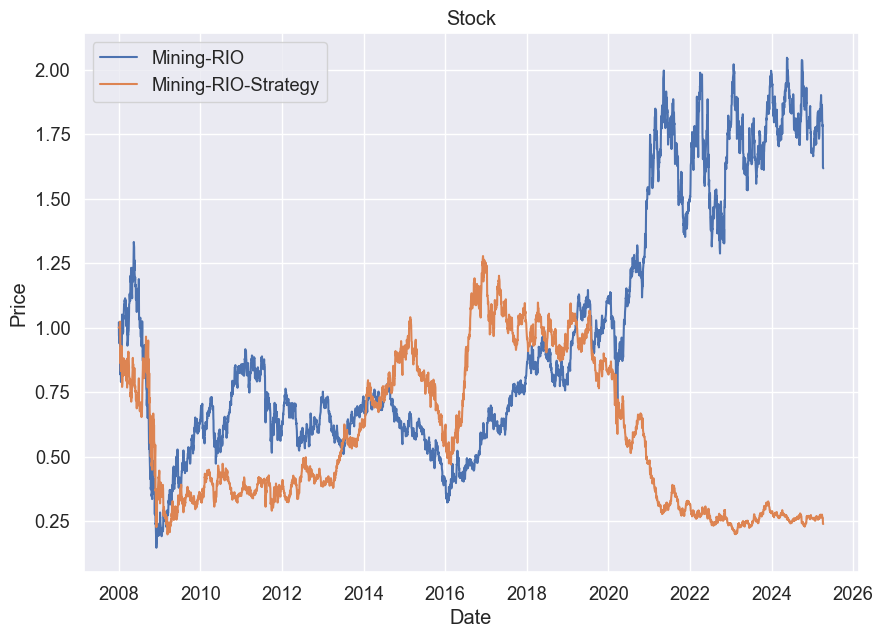

In [ ]:
plt.figure(figsize=(10, 7))
for industry, ticker in tickers.items():
    if ticker == 'RIO':
        plt.plot((df_strat[ticker] + 1).cumprod(), label=f"{industry}-{ticker}")
        plt.plot((df_strat[f'{ticker}_strategy'] + 1).cumprod(), label=f"{industry}-{ticker}-Strategy")
plt.legend()
plt.title('Stock')
plt.xlabel('Date')
plt.ylabel('Price')

plt.show()

### 1.2 Soient les deux paramètres, A et B. Pour chaque paramètre, choisir 100 valeurs. Pour chaque paire(A,B),calculer  une  mesure  de  performance  sur  l’entier  de  la  série  temporelle  de  chaque  actif,  par  exemple  le rendement moyen.

In [51]:
# MA ranges
As = np.linspace(2, 101, 100).astype(int)
Bs = np.linspace(2, 101, 100).astype(int)

ma_cache = {}
results = np.zeros((len(As), len(Bs)))

for i, A in enumerate(As):
    for j, B in enumerate(Bs):    
        if i < j:
            df_strat = strat_ma_crossover(df_price, A, B, ma_cache, ticker="RIO")

            for industry, ticker in tickers.items():
                if ticker == 'RIO':
                    results[i, j] = df_strat[f'{ticker}_strategy'].mean()

On a utilise le rendement moyen comme mesure de performance.

### 1.3 Le graphique de type heatmap pour illustrer les resultats obtenus.

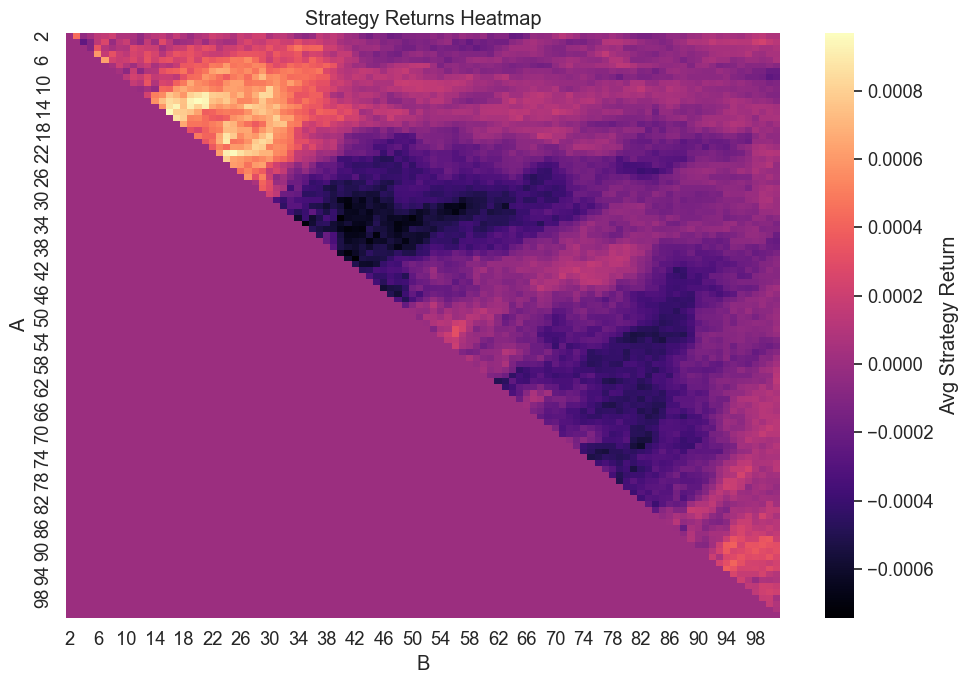

In [48]:
results_df = pd.DataFrame(results, index=As, columns=Bs)

# Create heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(results_df, cmap="magma", annot=False, fmt=".1f", 
            linewidths=0, cbar_kws={'label': 'Avg Strategy Return'})

# Labels and title
plt.xlabel("B")
plt.ylabel("A")
plt.title("Strategy Returns Heatmap")
plt.tight_layout()
plt.show()

In [38]:
top_3_strategies = results_df.stack().sort_values(ascending=False).head(3)

Ticker RIO has 257 changes in position.
Ticker RIO has 304 changes in position.
Ticker RIO has 573 changes in position.


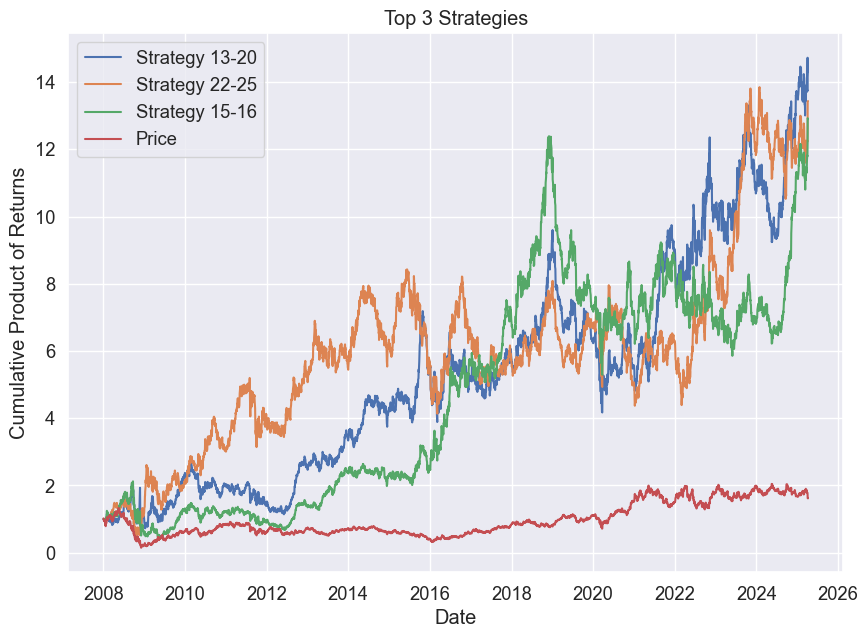

In [39]:
# Compute the top 3 strategy parameter pairs based on the highest values.
ticker = "RIO"
top3 = results_df.stack().nlargest(3)

plt.figure(figsize=(10, 7))
# Iterate over the top 3 strategies.
for (ma_short, ma_long), value in top3.items():
    # Get the strategy performance DataFrame.
    df_strat = strat_ma_crossover(df_price, 
                                  ma_short, 
                                  ma_long, 
                                  {},
                                  ticker=ticker,
                                  display_switch=True)  # Set to False to avoid extra output
    
    # Plot the price and the strategy performance curves.
    #plt.plot((df_strat['TM'] + 1).cumprod(), label=f"Price {ma_short}-{ma_long}")
    plt.plot((df_strat[f'{ticker}_strategy'] + 1).cumprod(), label=f"Strategy {ma_short}-{ma_long}")
plt.plot((df_strat[ticker] + 1).cumprod(), label=f"Price")
plt.legend()
plt.title('Top 3 Strategies')
plt.xlabel('Date')
plt.ylabel('Cumulative Product of Returns')
plt.show()

### 1.4 Est-ce que le resultat est stationnaire ? 

On va diviser les historique en deux moitiés et on va comparer.

In [28]:
As = np.linspace(2, 101, 100).astype(int)
Bs = np.linspace(2, 101, 100).astype(int)

ma_cache_first = {}
ma_cache_second = {}
results_first_half = np.zeros((len(As), len(Bs)))
results_second_half = np.zeros((len(As), len(Bs)))

# Dividing the data into two halves
df_price_first_half = df_price[:len(df_rend)//2]
df_price_second_half = df_price[len(df_rend)//2:]

for i, A in enumerate(As):
    for j, B in enumerate(Bs):
        if i < j:
            df_start_first_half = strat_ma_crossover(df_price_first_half, A, B, 
                                                    ma_cache_first, ticker="TM")
            df_start_second_half = strat_ma_crossover(df_price_second_half, A, B, 
                                                    ma_cache_second, ticker="TM")
            
            
            for industry, ticker in tickers.items():
                if ticker == 'TM':
                    results_first_half[i, j] = df_start_first_half[
                        f'{ticker}_strategy'].mean()
                    results_second_half[i, j] = df_start_second_half[
                        f'{ticker}_strategy'].mean()
                
results_first_half_df = pd.DataFrame(results_first_half, index=As, columns=Bs)
results_second_half_df = pd.DataFrame(results_second_half, index=As, columns=Bs)

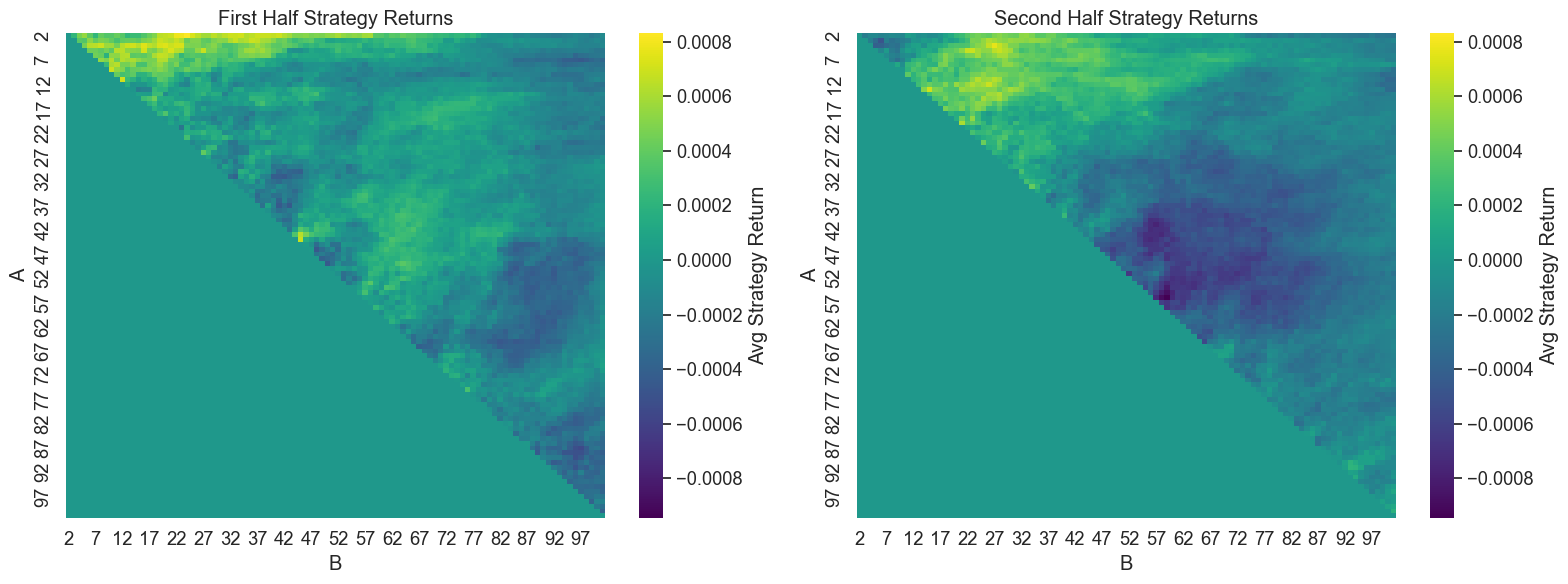

In [30]:
# Find the global minimum and maximum for the color scale
global_min = min(results_first_half_df.min().min(), results_second_half_df.min().min())
global_max = max(results_first_half_df.max().max(), results_second_half_df.max().max())

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(results_first_half_df, cmap="viridis", annot=False, fmt=".4f",
            vmin=global_min, vmax=global_max,
            ax=axes[0], cbar_kws={'label': 'Avg Strategy Return'})
axes[0].set_title("First Half Strategy Returns")
axes[0].set_xlabel("B")
axes[0].set_ylabel("A")

sns.heatmap(results_second_half_df, cmap="viridis", annot=False, fmt=".4f",
            vmin=global_min, vmax=global_max,
            ax=axes[1], cbar_kws={'label': 'Avg Strategy Return'})
axes[1].set_title("Second Half Strategy Returns")
axes[1].set_xlabel("B")
axes[1].set_ylabel("A")

plt.tight_layout()
plt.show()

We can see that both plots are not the same. Even though there are some similarities, some regions change drastically. Therefore, visually there is no evidence to say that the result is stationary.

## 2 - Stratégies de retour à la moyenne

This is also called mean-reversion technique

In [18]:
def strat_mean_reversion(df, window, k, ma_cache, vol_cache, ticker=None):
    
    df_strat = df.copy()
    
    if ticker is None:
        for industry, ticker in tickers.items():
            ma_col = f'{ticker}_ma_{window}'
            vol_col = f'{ticker}_vol_{window}'

            # Compute moving average and volatility only if not in cache
            if ma_col not in ma_cache:
                ma_cache[ma_col] = df[ticker].rolling(window=window).mean()
            if vol_col not in vol_cache:
                vol_cache[vol_col] = df[ticker].rolling(window=window).std()

            df_strat[ma_col] = ma_cache[ma_col]
            df_strat[vol_col] = vol_cache[vol_col]

            # Compute upper and lower bands
            upper_band = df_strat[ma_col] + k * df_strat[vol_col]
            lower_band = df_strat[ma_col] - k * df_strat[vol_col]

            # Vectorized signal generation
            df_strat[f'{ticker}_signal'] = np.where(
                df_strat[ticker] < lower_band, 1,  # Buy if price is below lower band
                np.where(df_strat[ticker] > upper_band, -1, 0)  # Sell if price is above upper band, else do nothing
            )

            # Compute strategy return (shifted signal to avoid lookahead bias)
            df_strat[f'{ticker}_strategy'] = df_strat[ticker] * df_strat[f'{ticker}_signal'].shift().fillna(0)
            
    elif ticker in df.columns:
        ma_col = f'{ticker}_ma_{window}'
        vol_col = f'{ticker}_vol_{window}'

        # Compute moving average and volatility only if not in cache
        if ma_col not in ma_cache:
            ma_cache[ma_col] = df[ticker].rolling(window=window).mean()
        if vol_col not in vol_cache:
            vol_cache[vol_col] = df[ticker].rolling(window=window).std()

        df_strat[ma_col] = ma_cache[ma_col]
        df_strat[vol_col] = vol_cache[vol_col]

        # Compute upper and lower bands
        upper_band = df_strat[ma_col] + k * df_strat[vol_col]
        lower_band = df_strat[ma_col] - k * df_strat[vol_col]

        # Vectorized signal generation
        df_strat[f'{ticker}_signal'] = np.where(
            df_strat[ticker] < lower_band, 1,  # Buy if price is below lower band
            np.where(df_strat[ticker] > upper_band, -1, 0)  # Sell if price is above upper band, else do nothing
        )

        # Compute strategy return (shifted signal to avoid lookahead bias)
        df_strat[f'{ticker}_strategy'] = df_strat[ticker] * df_strat[f'{ticker}_signal'].shift().fillna(0)
    
    else:
        raise ValueError(f"Ticker {ticker} not found in DataFrame columns.")
    
    return df_strat

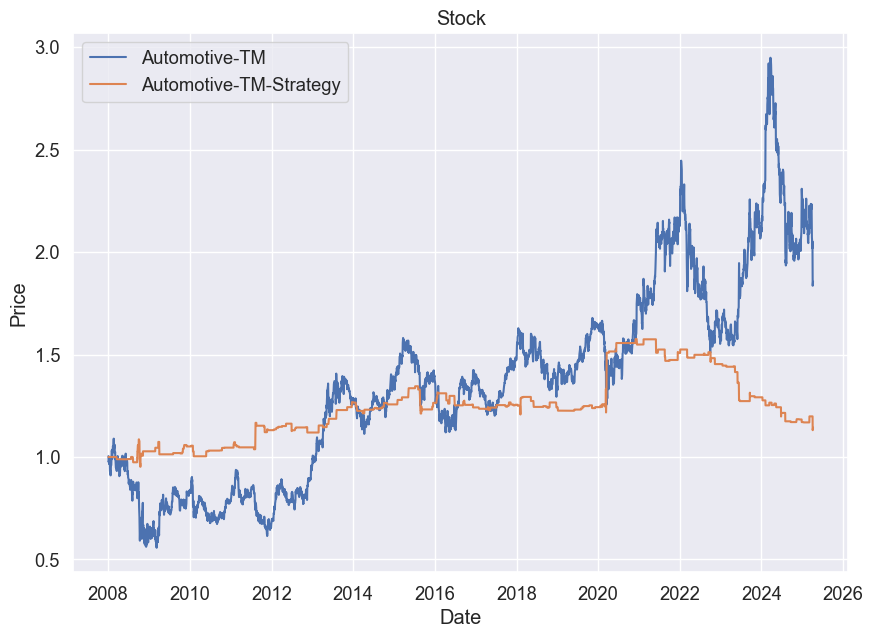

In [19]:
ma_cache = {}
vol_cache = {}

df_strat = strat_mean_reversion(df_rend, 
                                window=50, k=2, 
                                ma_cache=ma_cache, 
                                vol_cache=vol_cache,
                                ticker='TM')

plt.figure(figsize=(10, 7))
for industry, ticker in tickers.items():
    if ticker == 'TM':
        plt.plot((df_strat[ticker] + 1).cumprod(), label=f"{industry}-{ticker}")
        plt.plot((df_strat[f'{ticker}_strategy'] + 1).cumprod(), label=f"{industry}-{ticker}-Strategy")
plt.legend()
plt.title('Stock')
plt.xlabel('Date')
plt.ylabel('Price')

plt.show()

In [20]:
# Define range of moving averages
As = np.linspace(2, 101, 100).astype(int)
Ks = np.round(np.linspace(0.05, 3.5, 100), 4)

# Precompute moving averages cache to avoid redundant calculations
ma_cache = {}
vol_cache = {}

# Initialize results array
results_mean_reversion = np.zeros((len(As), len(Ks)))

for i, A in enumerate(As):
    
    for j, K in enumerate(Ks):
        df_strat = strat_mean_reversion(df_rend, 
                                window=A, k=K, 
                                ma_cache=ma_cache, 
                                vol_cache=vol_cache,
                                ticker='TM')

        for industry, ticker in tickers.items():
            if ticker == 'TM':
                results_mean_reversion[i, j] = df_strat[f'{ticker}_strategy'].mean()

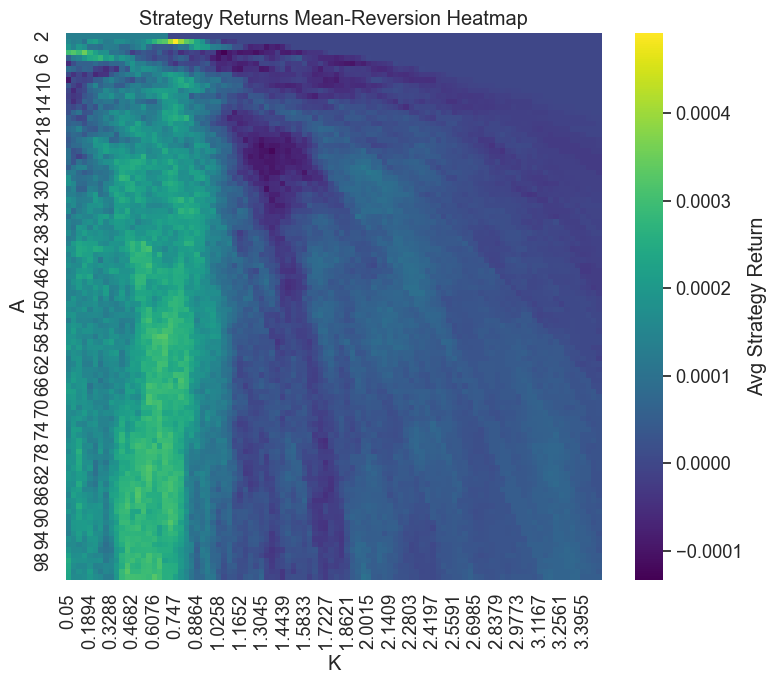

In [21]:
results_df = pd.DataFrame(results_mean_reversion, index=As, columns=Ks)

# Create heatmap
plt.figure(figsize=(8, 7))
sns.heatmap(results_df, cmap="viridis", annot=False, fmt=".4f", 
            linewidths=0, cbar_kws={'label': 'Avg Strategy Return'})

# Labels and title
plt.xlabel("K")
plt.ylabel("A")
plt.title("Strategy Returns Mean-Reversion Heatmap")
plt.tight_layout()
plt.show()

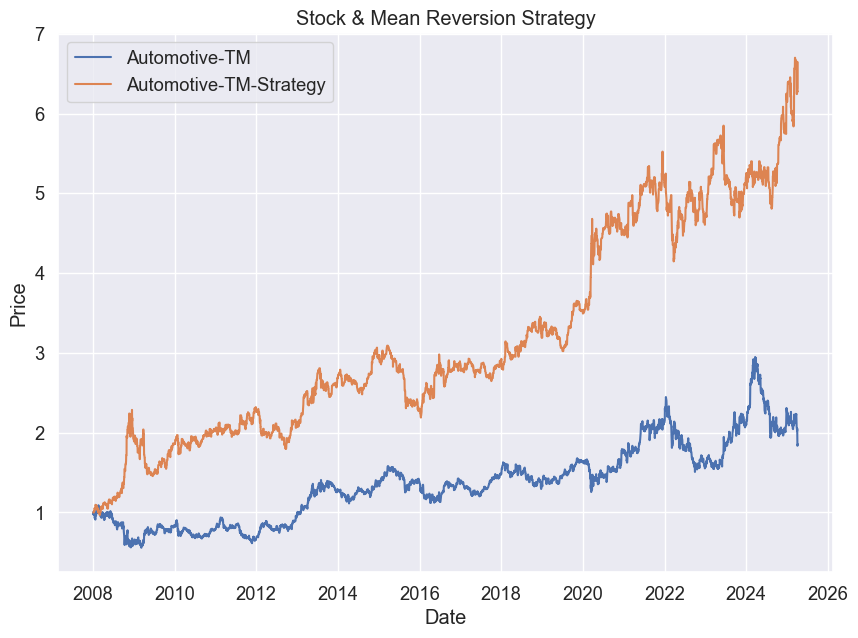

In [22]:
max_value_index_mr = results_df.stack().idxmax()
df_strat = strat_mean_reversion(df_rend, 
                              max_value_index_mr[0], 
                              max_value_index_mr[1], {}, {})

plt.figure(figsize=(10, 7))
for industry, ticker in tickers.items():
    if industry == 'Automotive':
        plt.plot((df_strat[ticker] + 1).cumprod(), label=f"{industry}-{ticker}")
        plt.plot((df_strat[f'{ticker}_strategy'] + 1).cumprod(), label=f"{industry}-{ticker}-Strategy")
plt.legend()
plt.title('Stock & Mean Reversion Strategy')
plt.xlabel('Date')
plt.ylabel('Price')

plt.show()

In [23]:
df_rend_first_half = df_rend.iloc[:len(df_rend)//2]
df_rend_second_half = df_rend.iloc[len(df_rend)//2:]

As = np.linspace(2, 101, 100).astype(int)
Ks = np.round(np.linspace(0.05, 3.5, 100), 4)

ma_cache_first = {}
vol_cache_first = {}
results_mean_reversion_first = np.zeros((len(As), len(Ks)))

ma_cache_second = {}
vol_cache_second = {}
results_mean_reversion_second = np.zeros((len(As), len(Ks)))

for i, A in enumerate(As):
    for j, K in enumerate(Ks):
        
        df_strat_first = strat_mean_reversion(df_rend_first_half, 
                                              window=A, k=K, 
                                              ma_cache=ma_cache_first, 
                                              vol_cache=vol_cache_first,
                                              ticker='TM')
        results_mean_reversion_first[i, j] = df_strat_first['TM_strategy'].mean()

        df_strat_second = strat_mean_reversion(df_rend_second_half, 
                                               window=A, k=K, 
                                               ma_cache=ma_cache_second, 
                                               vol_cache=vol_cache_second,
                                               ticker='TM')
        results_mean_reversion_second[i, j] = df_strat_second['TM_strategy'].mean()

results_first_df = pd.DataFrame(results_mean_reversion_first, index=As, columns=Ks)
results_second_df = pd.DataFrame(results_mean_reversion_second, index=As, columns=Ks)

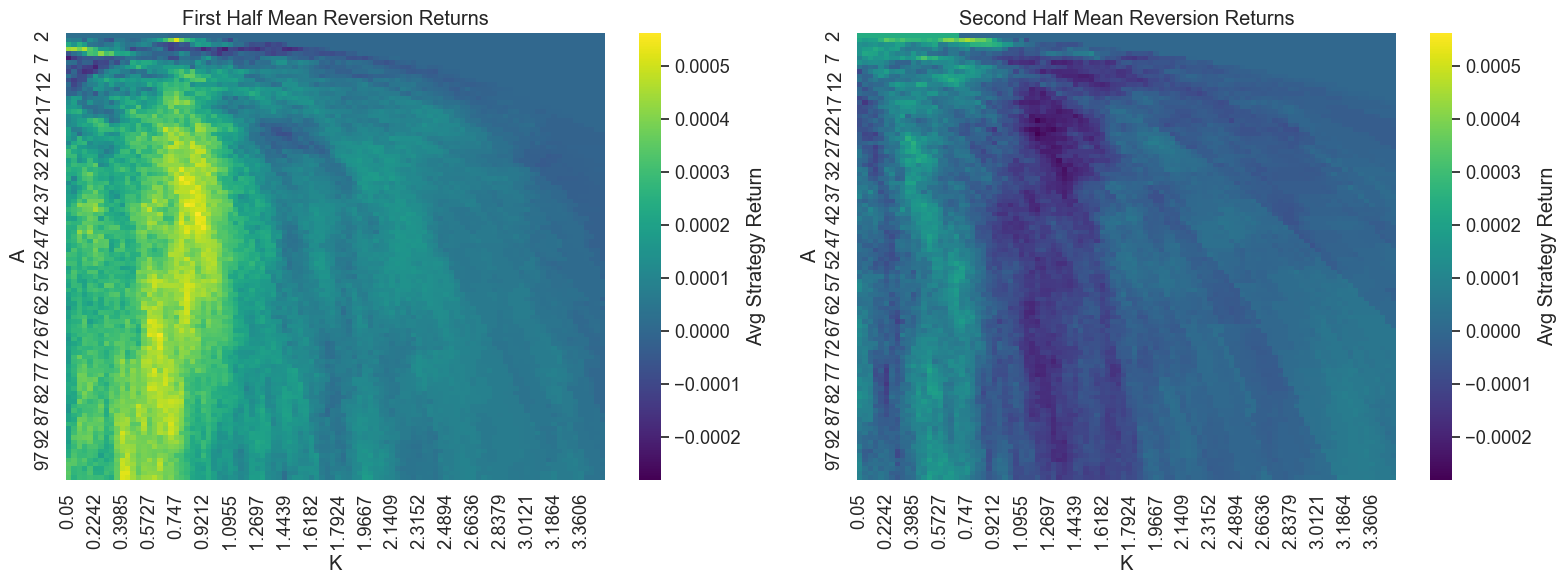

In [24]:
global_min = min(results_first_df.min().min(), results_second_df.min().min())
global_max = max(results_first_df.max().max(), results_second_df.max().max())

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(results_first_df, cmap="viridis", annot=False, fmt=".4f",
            vmin=global_min, vmax=global_max, ax=axes[0],
            cbar_kws={'label': 'Avg Strategy Return'})
axes[0].set_title("First Half Mean Reversion Returns")
axes[0].set_xlabel("K")
axes[0].set_ylabel("A")

sns.heatmap(results_second_df, cmap="viridis", annot=False, fmt=".4f",
            vmin=global_min, vmax=global_max, ax=axes[1],
            cbar_kws={'label': 'Avg Strategy Return'})
axes[1].set_title("Second Half Mean Reversion Returns")
axes[1].set_xlabel("K")
axes[1].set_ylabel("A")

plt.tight_layout()
plt.show()

From the previous plots, we can see that the overall shape is the same, but the values of average returns are different. Thus, this strategy is not stationary per se, since it depends on the time periods we are looking at.

## 3 - Conditional Strategy


In [25]:
def strat_conditional(df, A, K, cache = {}, ticker=None):
    df_strat = df.copy()
    
    if ticker is None:
        for industry, ticker in tickers.items():
            key_mu = f'{ticker}_mu_{A}'
            key_threshold_high = f'{ticker}_threshold_high_{A}_{K}'
            key_threshold_low = f'{ticker}_threshold_low_{A}_{K}'
            
            # Cache market mstate (sign of the rolling mean)
            if key_mu not in cache:
                cache[key_mu] = np.sign(df_strat[ticker].rolling(window=A).mean().shift(1))
            df_strat[f'{ticker}_mu'] = cache[key_mu]
            
            # Cache high and low quantile thresholds
            if key_threshold_high not in cache:
                cache[key_threshold_high] = df_strat[ticker].rolling(window=A).quantile(K).shift(1)
            if key_threshold_low not in cache:
                cache[key_threshold_low] = df_strat[ticker].rolling(window=A).quantile(1 - K).shift(1)
            threshold_high = cache[key_threshold_high]
            threshold_low = cache[key_threshold_low]
            
            # Conditional signal and strategy
            df_strat[f'{ticker}_signal'] = np.where(
                (df_strat[f'{ticker}_mu'] == 1) & (df_strat[ticker] > threshold_high), 1,
                np.where((df_strat[f'{ticker}_mu'] == -1) & (df_strat[ticker] < threshold_low), -1, 0)
            )
            df_strat[f'{ticker}_strategy'] = (df_strat[f'{ticker}_signal'].shift() * df_strat[ticker]).fillna(0)
    
    elif ticker in df.columns:
        key_mu = f'{ticker}_mu_{A}'
        key_threshold_high = f'{ticker}_threshold_high_{A}_{K}'
        key_threshold_low = f'{ticker}_threshold_low_{A}_{K}'
        
        if key_mu not in cache:
            cache[key_mu] = np.sign(df_strat[ticker].rolling(window=A).mean().shift(1))
        df_strat[f'{ticker}_mu'] = cache[key_mu]
        
        if key_threshold_high not in cache:
            cache[key_threshold_high] = df_strat[ticker].rolling(window=A).quantile(K).shift(1)
        if key_threshold_low not in cache:
            cache[key_threshold_low] = df_strat[ticker].rolling(window=A).quantile(1 - K).shift(1)
        threshold_high = cache[key_threshold_high]
        threshold_low = cache[key_threshold_low]
        
        df_strat[f'{ticker}_signal'] = np.where(
            (df_strat[f'{ticker}_mu'] == 1) & (df_strat[ticker] > threshold_high), 1,
            np.where((df_strat[f'{ticker}_mu'] == -1) & (df_strat[ticker] < threshold_low), -1, 0)
        )
        df_strat[f'{ticker}_strategy'] = (df_strat[f'{ticker}_signal'].shift() * df_strat[ticker]).fillna(0)
    
    else:
        raise ValueError(f"Ticker {ticker} not found in DataFrame columns.")
    
    return df_strat


In [26]:
As = np.linspace(5, 105, 100, dtype=int)  
Ks = np.round( np.linspace(0.01, 0.99, 99), 5)

performance_matrix = np.zeros((len(As), len(Ks)))
cache = {}
ticker = "TM"

for i, A in enumerate(As):
    for j, K in enumerate(Ks):
        df_strat = strat_conditional(df_rend, A, K,
                                     cache=cache, ticker=ticker)

        performance_matrix[i, j] = df_strat[f'{ticker}_strategy'].mean()


performance_df = pd.DataFrame(performance_matrix, index=As, columns=Ks)

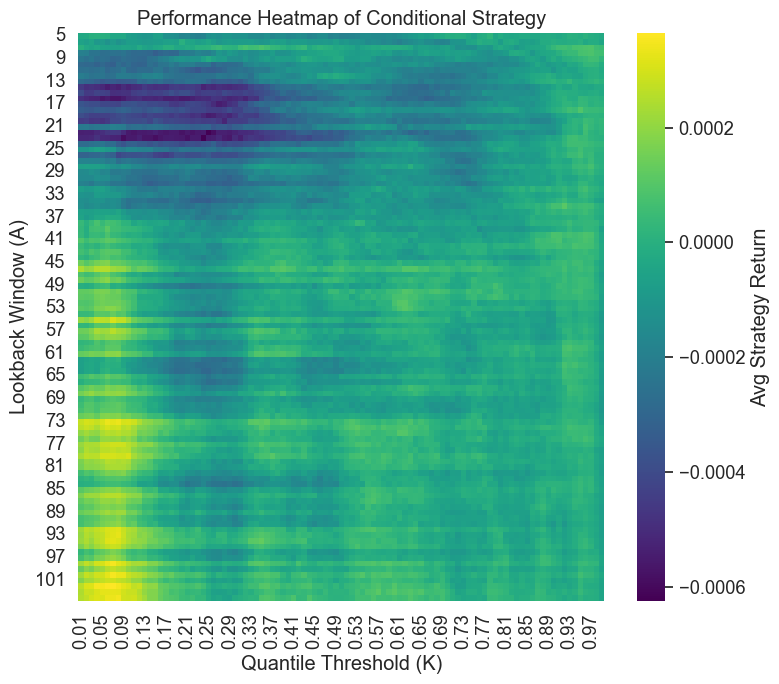

In [27]:
plt.figure(figsize=(8, 7))
sns.heatmap(performance_df, cmap="viridis", annot=False, fmt=".4f", 
            linewidths=0, cbar_kws={'label': 'Avg Strategy Return'})

plt.xlabel("Quantile Threshold (K)")
plt.ylabel("Lookback Window (A)")
plt.title("Performance Heatmap of Conditional Strategy")
plt.tight_layout()
plt.show()

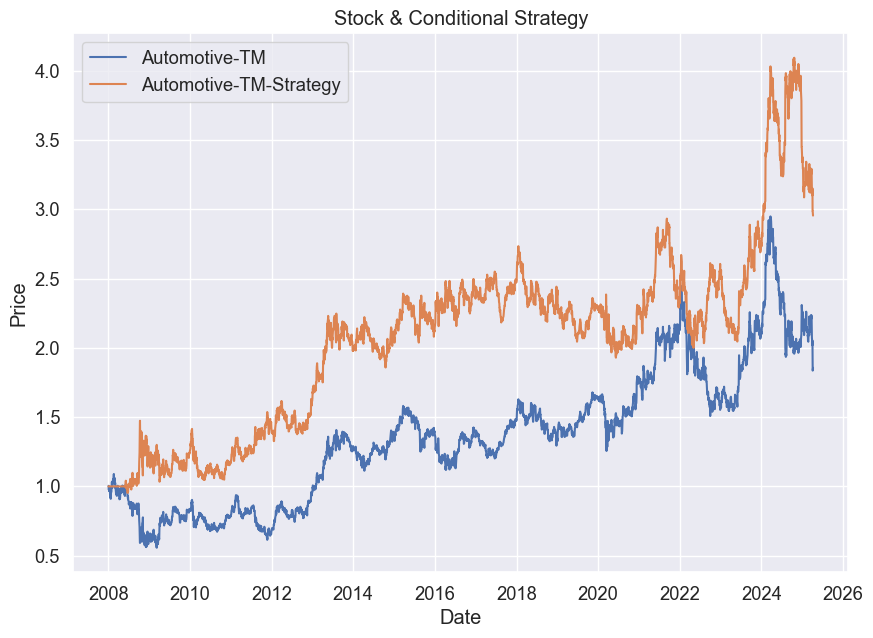

In [28]:
max_value_index_c = performance_df.stack().idxmax()

df_strat = strat_conditional(df_rend,
                                max_value_index_c[0], 
                                max_value_index_c[1], {}, 
                                ticker = 'TM')
plt.figure(figsize=(10, 7))
for industry, ticker in tickers.items():
    if industry == 'Automotive':
        plt.plot((df_strat[ticker] + 1).cumprod(), label=f"{industry}-{ticker}")
        plt.plot((df_strat[f'{ticker}_strategy'] + 1).cumprod(), label=f"{industry}-{ticker}-Strategy")
plt.legend()
plt.title('Stock & Conditional Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [29]:
df_rend_first_half = df_rend.iloc[: len(df_rend)//2]
df_rend_second_half = df_rend.iloc[len(df_rend)//2 :]

As = np.linspace(5, 105, 100, dtype = int)
Ks = np.round(np.linspace(0.01, 0.99, 99), 5)

performance_first = np.zeros((len(As), len(Ks)))
performance_second = np.zeros((len(As), len(Ks)))

cache_first = {}
cache_second = {}

for i, A in enumerate(As):
    for j, K in enumerate(Ks):
        df_strat_first = strat_conditional(df_rend_first_half, A, K, cache=cache_first, ticker=ticker)
        df_strat_second = strat_conditional(df_rend_second_half, A, K, cache=cache_second, ticker=ticker)
        
        performance_first[i, j] = df_strat_first[f'{ticker}_strategy'].mean()
        performance_second[i, j] = df_strat_second[f'{ticker}_strategy'].mean()

performance_first_df = pd.DataFrame(performance_first, index=As, columns=Ks)
performance_second_df = pd.DataFrame(performance_second, index=As, columns=Ks)

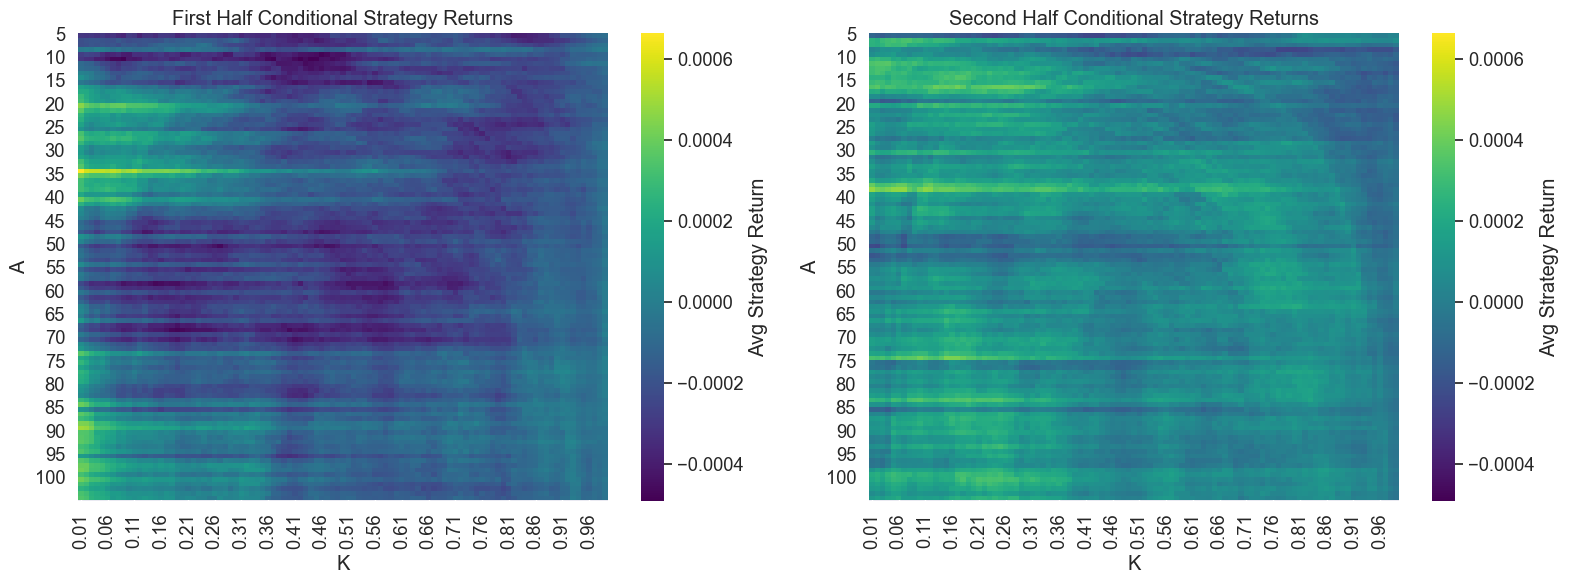

In [30]:
global_min = min(performance_first_df.min().min(), performance_second_df.min().min())
global_max = max(performance_first_df.max().max(), performance_second_df.max().max())

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(performance_first_df, cmap="viridis", annot=False, fmt=".4f",
            vmin=global_min, vmax=global_max, ax=axes[0],
            cbar_kws={'label': 'Avg Strategy Return'})
axes[0].set_title("First Half Conditional Strategy Returns")
axes[0].set_xlabel("K")
axes[0].set_ylabel("A")

sns.heatmap(performance_second_df, cmap="viridis", annot=False, fmt=".4f",
            vmin=global_min, vmax=global_max, ax=axes[1],
            cbar_kws={'label': 'Avg Strategy Return'})
axes[1].set_title("Second Half Conditional Strategy Returns")
axes[1].set_xlabel("K")
axes[1].set_ylabel("A")

plt.tight_layout()
plt.show()

They do have some similar shapes, yet the returns truly depend on the time period we are looking at. Not stationary.

## 4 - Diagnostique dynamique